In [1]:
text = '''
13:24:36.051 -> 112 -- 1
13:24:36.546 -> 115 -- 1
13:24:37.044 -> 117 -- 1
13:24:37.560 -> 119 -- 1
13:24:38.038 -> 121 -- 1
13:24:38.544 -> 122 -- 1
13:24:39.055 -> 123 -- 1
13:24:39.578 -> 124 -- 1
13:24:40.057 -> 125 -- 1
13:24:40.582 -> 125 -- 1
13:24:41.072 -> 126 -- 1
13:24:41.573 -> 126 -- 1
13:24:42.064 -> 127 -- 1
13:24:42.599 -> 127 -- 1
13:24:43.062 -> 127 -- 1
13:24:43.592 -> 128 -- 1
13:24:44.081 -> 128 -- 1
13:24:44.595 -> 128 -- 1
13:24:45.064 -> 128 -- 1
13:24:45.599 -> 128 -- 1
13:24:46.095 -> 128 -- 1
13:24:46.599 -> 128 -- 1
13:24:47.117 -> 128 -- 1
13:24:47.590 -> 128 -- 1
13:24:48.107 -> 128 -- 1
13:24:48.587 -> 128 -- 1
13:24:49.104 -> 128 -- 1
13:24:49.600 -> 128 -- 1
'''

In [58]:
# text = '''
# 01/02/1999-12:32:51.2548 -> 25 -- 64
# 01/02/1999-12:32:52.2648 -> 25 -- 65
# 01/02/1999-12:32:53.2788 -> 25 -- 66
# 01/02/1999-12:32:54.348 -> 25 -- 64

# '''

In [2]:
def format(text):
    import numpy as np, datetime as dt
    text2 = text.strip().split('\n')
    for i in range(len(text2)):
        text2[i] = text2[i].split(' -> ')
    text3 = []
    for row in text2:
        Row = [row[0]]
        Row.extend(row[1].split(' -- '))
        text3.append(Row)
    TODAY = dt.datetime.today().strftime('%d/%m/%Y-')
    a = dt.datetime.strptime(TODAY+text3[0][0],'%d/%m/%Y-%H:%M:%S.%f').timestamp()
    for i in range(len(text3)):
        text3[i][0] = dt.datetime.strptime(TODAY+text3[i][0],'%d/%m/%Y-%H:%M:%S.%f').timestamp() - a
        text3[i][1] = float(text3[i][1])
        text3[i][2] = float(text3[i][2])
    dados = np.array(text3)     
    return dados    

In [39]:
def plot(dados,name='dados.png'):
    import matplotlib.pyplot as plt
    from matplotlib import gridspec
    fig = plt.figure(figsize=(20, 20)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4]) 
    plt.margins(0)
    ax0 = plt.subplot(gs[0])
    plt.box(False)
    ax0.plot(dados[:,0], dados[:,1])
    ax0.set_label('de')
    ax0.set_ylabel('Potência (%)')
    ax1 = plt.subplot(gs[1])
    plt.box(False)
    ax1.plot(dados[:,0], dados[:,2],'r')
    ax1.set_ylabel('Temperatura (°C)')
    ax1.set_xlabel('tempo (s)')
    fig.savefig(name,facecolor='white',bbox_inches='tight')
    return fig

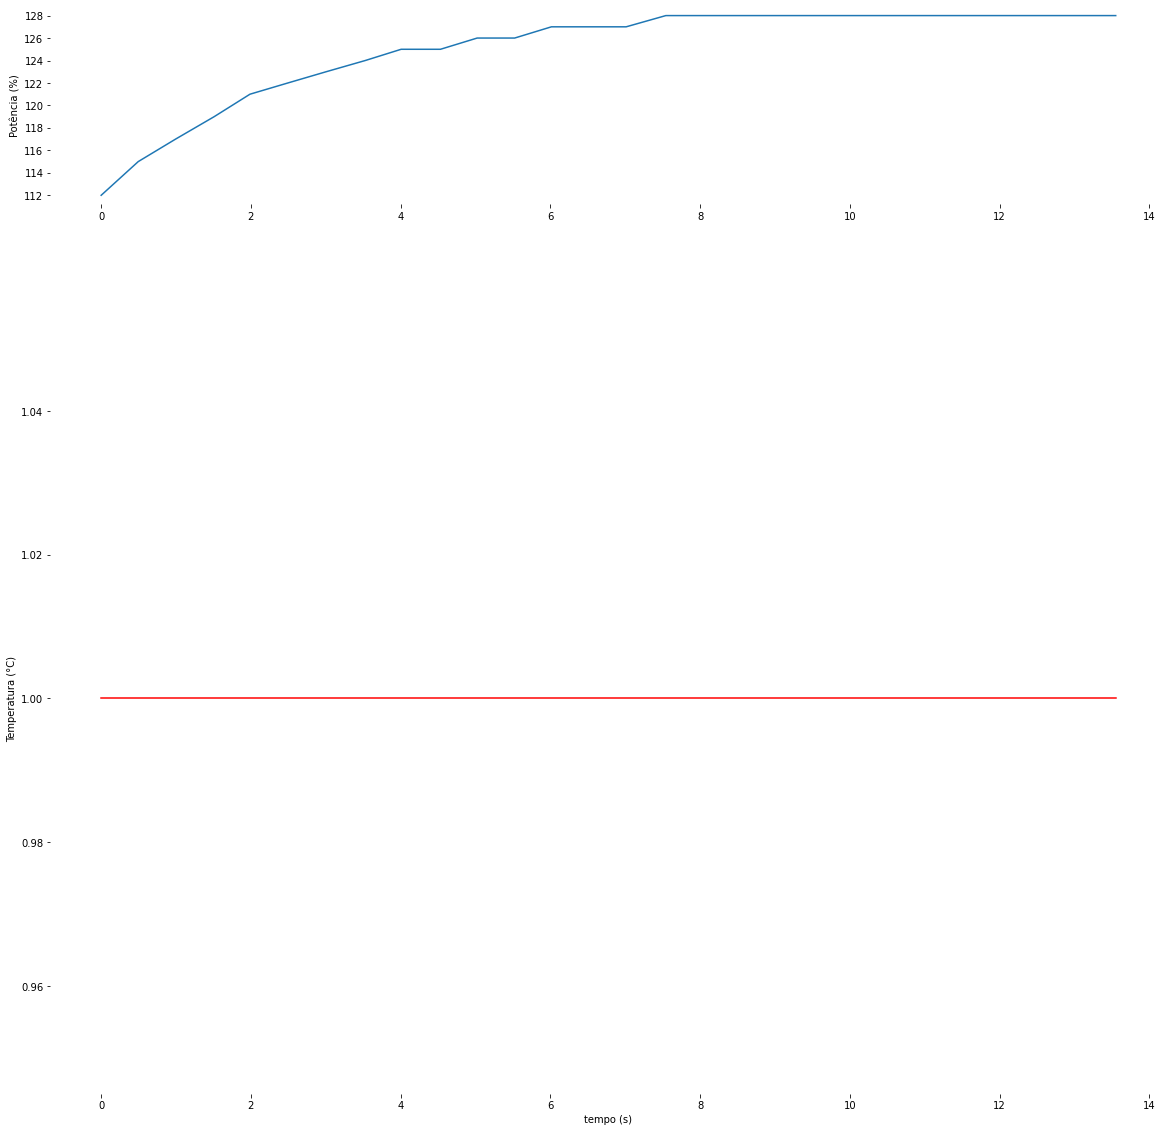

In [40]:
fig = plot(format(text))

In [76]:
##

## Tentativa 1

In [10]:
a = [36,36,36,36,36,36,36,36,36,36,36,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,38,38,38,38,38,39,39,39,39,39,40,40,40,41,41,41,42,42,42,43,43,44,44,44,45,45,45,46,46,46,46,46,47,47,47,48,48,48,48,48,48,48,48,49,48,48,49,49,49,49,49,49,49,49,49,48,48,49,49,48,48,48,48,48,48,48,48,48,48,48]

In [11]:
for i in range(len(a)):
    a[i] = [i,a[i],0]

In [12]:
for i in range(len(a)):
    if i > 28 and i < 61:
        a[i][2] = 100
    else: a[i][2] = 53

In [13]:
import matplotlib.pyplot as plt, numpy as np
from matplotlib import gridspec

In [14]:
a = np.array(a)

Text(0.5, 0, 'tempo (s)')

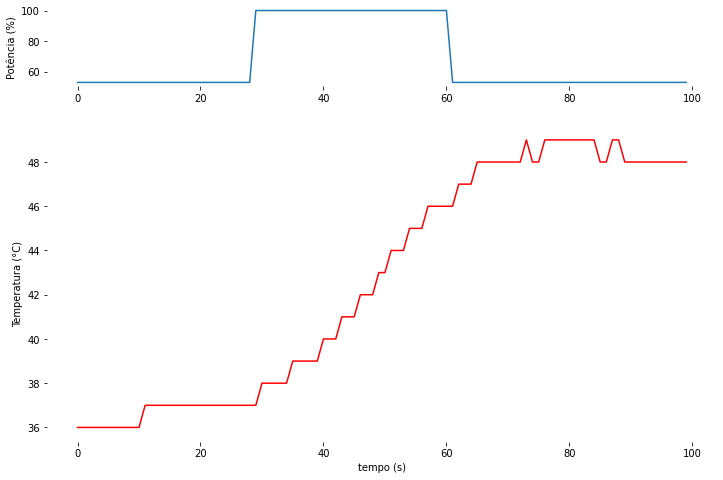

In [15]:
fig = plt.figure(figsize=(12, 8)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4]) 
ax0 = plt.subplot(gs[0])
plt.box(False)
ax0.plot(a[:,0], a[:,2])
ax0.set_label('de')
ax0.set_ylabel('Potência (%)')
ax1 = plt.subplot(gs[1])
plt.box(False)
ax1.plot(a[:,0], a[:,1],'r')
ax1.set_ylabel('Temperatura (°C)')
ax1.set_xlabel('tempo (s)')

In [16]:
fig.savefig('dimmer.png')

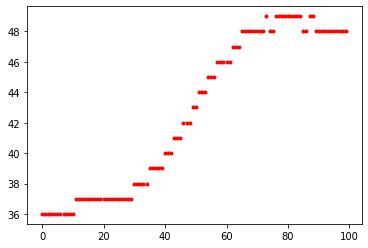

In [12]:
plt.plot(a[:,0],a[:,1],'r.')